In [2]:
import cv2
import sys
import os
import time
import dlib
from skimage import io
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

C:\Users\test\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#detect face by haarcascade method 
cascPath = "haarcascade_frontalface_default.xml"
dataPath='D:\\code\\pycode\\faceRecognition\\database\\'
patchPath='D:\\code\\pycode\\faceRecognition\\faceData\\'
faceCascade = cv2.CascadeClassifier(cascPath)
for personFolder in os.listdir(dataPath):
    personPath=os.path.join(dataPath,personFolder)
    for fileName in os.listdir(personPath):
        image = cv2.imread(os.path.join(personPath,fileName))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))
        if(len(faces)==1):
            x,y,w,h=list(faces[0])
            facePatch=image[y:y+h,x:x+w]
            if(not os.path.exists(os.path.join(patchPath,personFolder))):
                os.mkdir(os.path.join(patchPath,personFolder)) 
            cv2.imwrite(os.path.join(patchPath+personFolder,fileName),facePatch)

In [4]:
detector = dlib.get_frontal_face_detector()
dataPath='D:\\code\\pycode\\faceRecognition\\database\\'
patchPath='D:\\code\\pycode\\faceRecognition\\faceData1\\'
detector = dlib.get_frontal_face_detector()
datagen = ImageDataGenerator(
        rotation_range=20,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
        rescale=None,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        data_format='channels_last',
        cval=0,
        #channel_shift_range=0,
        vertical_flip=False)
for personFolder in os.listdir(dataPath):
    personPath=os.path.join(dataPath,personFolder)
    for fileName in os.listdir(personPath):
        image = cv2.imread(os.path.join(personPath,fileName))
        dets = detector(image, 1)
        for i, d in enumerate(dets):
            print("person{} face{} Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(personFolder,fileName[-5:-4],i, d.left(), d.top(), d.right(), d.bottom()))
            facePatch=image[d.top():d.bottom(),d.left():d.right()]
            cv2.imwrite(os.path.join(patchPath+personFolder,fileName),facePatch)
            facePatch=img_to_array(facePatch)
            facePatch = facePatch.reshape((1,) + facePatch.shape)
            if(not os.path.exists(os.path.join(patchPath,personFolder))):
                os.mkdir(os.path.join(patchPath,personFolder)) 
                
            i = 0
            for batch in datagen.flow(facePatch, batch_size=5,
                                      save_to_dir=None#os.path.join(patchPath,personFolder), 
                                      #save_prefix=personFolder, 
                                      #save_format='jpeg'
                                      ):
                cv2.imwrite(os.path.join(patchPath+personFolder,fileName[:-4]+str(i)+'.JPG'),batch[0].astype(int))
                i += 1
                if i > 5:
                    break  # 否则生成器会退出循环
            


person1 faceF Detection 0: Left: 296 Top: 182 Right: 425 Bottom: 311
person1 faceF Detection 0: Left: 253 Top: 167 Right: 408 Bottom: 322
person1 faceF Detection 0: Left: 196 Top: 168 Right: 325 Bottom: 297
person1 faceF Detection 0: Left: 239 Top: 211 Right: 368 Bottom: 340
person1 faceF Detection 0: Left: 236 Top: 202 Right: 390 Bottom: 356
person10 faceF Detection 0: Left: 262 Top: 160 Right: 448 Bottom: 345
person10 faceF Detection 0: Left: 216 Top: 192 Right: 439 Bottom: 415
person10 faceF Detection 0: Left: 216 Top: 192 Right: 439 Bottom: 415
person10 faceF Detection 0: Left: 221 Top: 222 Right: 407 Bottom: 407
person100 faceF Detection 0: Left: 221 Top: 160 Right: 407 Bottom: 345
person100 faceF Detection 0: Left: 221 Top: 160 Right: 407 Bottom: 345
person100 faceF Detection 0: Left: 180 Top: 139 Right: 366 Bottom: 325
person101 faceF Detection 0: Left: 242 Top: 160 Right: 428 Bottom: 345
person101 faceF Detection 0: Left: 139 Top: 139 Right: 324 Bottom: 325
person101 faceF Dete

person20 faceF Detection 0: Left: 242 Top: 160 Right: 428 Bottom: 345
person20 faceF Detection 0: Left: 221 Top: 160 Right: 407 Bottom: 345
person21 faceF Detection 0: Left: 304 Top: 180 Right: 489 Bottom: 366
person21 faceF Detection 0: Left: 216 Top: 167 Right: 439 Bottom: 390
person21 faceF Detection 0: Left: 139 Top: 180 Right: 324 Bottom: 366
person21 faceF Detection 0: Left: 221 Top: 201 Right: 407 Bottom: 387
person21 faceF Detection 0: Left: 201 Top: 201 Right: 386 Bottom: 387
person22 faceF Detection 0: Left: 291 Top: 167 Right: 513 Bottom: 390
person22 faceF Detection 0: Left: 216 Top: 167 Right: 439 Bottom: 390
person22 faceF Detection 0: Left: 92 Top: 142 Right: 315 Bottom: 365
person22 faceF Detection 0: Left: 191 Top: 167 Right: 414 Bottom: 390
person22 faceF Detection 0: Left: 216 Top: 167 Right: 439 Bottom: 390
person23 faceF Detection 0: Left: 283 Top: 139 Right: 469 Bottom: 325
person23 faceF Detection 0: Left: 221 Top: 180 Right: 407 Bottom: 366
person23 faceF Detect

KeyboardInterrupt: 

C:\Users\test\Anaconda3\lib\site-packages\imgaug\augmenters\meta.py:379: UserWarning: You provided a numpy array of shape (480, 640, 3) as input to augment_images(), which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use augment_image(image) or augment_images([image]), otherwise you will not get the expected augmentations.
  "you will not get the expected augmentations." % (images_copy.shape,))


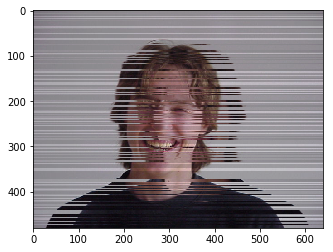

In [38]:
images=io.imread('D:\\code\\pycode\\faceRecognition\\database\\99\\MVC-007F.JPG')

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'，
        cval=0,
        channel_shift_range=0,
        horizontal_flip=False,
        vertical_flip=False,
        rescale=None)
#plt.imshow(images_aug2)
#plt.imshow(images_aug3)
#plt.imshow(images_aug4)

In [6]:
img=io.imread('D:\\code\\pycode\\faceRecognition\\database\\99\\MVC-007F.JPG')
detector = dlib.get_frontal_face_detector()
dets = detector(img, 1)
dets

In [7]:
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(i, d.left(), d.top(), d.right(), d.bottom()))

Detection 0: Left: 262 Top: 160 Right: 448 Bottom: 345


In [8]:
dets[0]

rectangle(262,160,448,345)